In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('data/data_regression.csv')
print(data.shape)
print(data)

(100, 2)
            x          y
0   32.502345  31.707006
1   53.426804  68.777596
2   61.530358  62.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]


In [3]:
X=data['x']# get all x column
Y=data.iloc[:,1] #get all y coloumn by another way
print("X=",X)
print("Y=",Y)
print(type(X))
print(type(Y))
# two ways have same result and same type of result

X= 0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
        ...    
95    50.030174
96    49.239765
97    50.039576
98    48.149859
99    25.128485
Name: x, Length: 100, dtype: float64
Y= 0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: y, Length: 100, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=75)
print(X_train)
print(y_train)

13    58.168471
18    45.618644
83    59.049741
51    44.502538
47    53.575078
        ...    
26    57.310003
64    33.644706
8     48.105042
81    56.868901
19    38.816818
Name: x, Length: 75, dtype: float64
13    75.392870
18    48.847153
83    77.634183
51    65.101712
47    87.994453
        ...    
26    95.455053
64    69.899682
8     75.331242
81    83.142750
19    56.877213
Name: y, Length: 75, dtype: float64


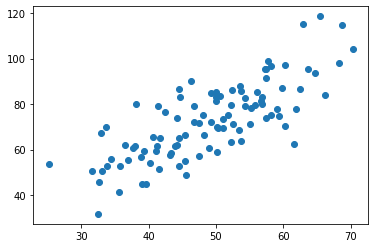

In [4]:
plt.scatter(X,Y) ## draw Scatter-Dot Plot 
plt.show()

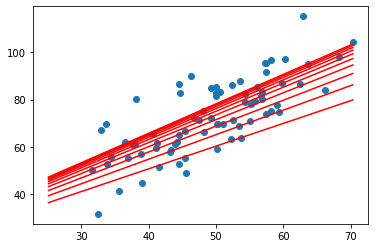

In [32]:
#train model to find teta0 and teta1
#declare parameters and initial teta0 and teta1
lr=0.0001
teta0=0
teta1=1
iteration=10
n=float(len(X_train))
plt.scatter(X_train,Y_train) ## draw Scatter-Dot Plot 
for i in range(iteration):
    y_predict=teta0+(teta1*X_train)
    #print("predict=",y_predict)
    # Derivative for teat0
    d_teta0=(1/n)* sum(y_predict-Y_train)
    d_teta1=(1/n)*sum(X_train*(y_predict-Y_train) )
    teta0=teta0-(lr *d_teta0)
    teta1=teta1-(lr*d_teta1)
    Y_pred = teta1*X_train + teta1
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
#plt.plot([X[0], X[n-1]], [Y_pred[0], Y_pred[n-1]], color='red')  # regression line
plt.show()

In [34]:
Y_pred = teta1*X_test + teta1 # predict for x_train inpute

In [35]:
def MAE(y_pr,y_val):
    error = abs(y_pr - y_val)
    loss = (error).mean()
    return loss

print(MAE(Y_pred,Y_test))## calculate mean absolute error in y_test

9.67956998880734


In [36]:
def RSME(y_pr,y_val):
    error = (y_pr - y_val)
    loss = (error**2).mean()
    l=math.sqrt(loss)
    return l
print(RSME(Y_pred,Y_test))

12.1752270179311
